Using NN for the Classification Task of handwritten digits

In [1]:
# hand written digits
from google.colab import drive
drive.mount('/content/drive')
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path="/content/drive/My Drive/Colab Notebooks/WCS/"

In [3]:
import pandas as pd
train_data = pd.read_csv(path+'mnist_train_100.csv', header = None)
#train_data.iloc[0]
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Load the data:
raw_data = open(path + "mnist_train_100.csv", 'r') # "r" stands for "read only" mode.
data = raw_data.readlines() # read all the lines of a file in a list.
raw_data.close() # remove temporal file from the environment in order to save memory.

In [5]:
type(data)

list

In [6]:
# Inspect the data - check the number of observations:
len(data) # length of the object.

100

In [7]:
# Inspect a particular observation of the data:
data[0] # show observation number 0 from the list (remember that in Python numbering starts from 0).


'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

- A particular observation looks like a string of 785 elements (label of the 
image + 784 elements for each pixels of a 28x28 image).
- Each element representing a pixel is a number from 0 to 255 (from white to black color).
- The first element in the line is the label of the image and therefore is a number from 0 to 9.

Using matplotlib, we can also reconstruct the original image based on the data about each pixel in the string.


In [8]:
# Load the package to plot the data:
import matplotlib.pyplot as mpp
%matplotlib inline

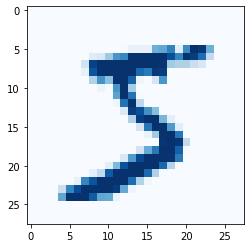

In [9]:
# Plot the data:
observation = data[0].split(',') # break down observation number 0 (comma is used to identify each element).
image = np.asfarray(observation[1:]).reshape((28,28)) #asfarray returns an array converted as float
#print(image)
# take all the elements starting from the element 1
# (exclude element number 0, that corresponds to the label) and reshape them as an array with dimension 28 by 28.
mpp.imshow(image, cmap='Blues') # show the plot of this array using blue pallete.

For each observation we have 784 elements/features as an input (label element is excluded). Accordingly,  we should have 784 iput nodes.
Similarly, as we have 10 different options for the outcome (handwritten numbers are labeled from 0 to 9) the number of output nodes should be 10 .
As the number of hidden nodes from we could start by using 90. Such a number has been assigned based on some proportionality assumptions which will be checked later: 90 is 9 times higher than 10 and approximately 9 times smaller than 784.

We are now going to  implement the  neural network with the Keras framework. Keras is an open source neural network library written in Python. 
https://keras.io/api/models/model_training_apis/


In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import pandas as pd

In [11]:
names = ["y"] + list(range(1,785))


df = pd.read_csv(path+"mnist_train.csv",
                 names=names)

df_test = pd.read_csv(path+"mnist_test.csv",
                     names=names)

In [12]:
df.shape

(60000, 785)

In [13]:
df_test.shape

(10000, 785)

Next we separate labels from features in both train and test set and transform them from dataframes to numpy arrays, which are better suited for modeling.

In [14]:
df.head()

,y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
y_train = df['y'].values
# normalizing the data and making sure to not have only 0
# Our values in our input vector are in the range from 0 to 255. Therefore we should divide input vector by 255,
# multiply it by 0,99 and add 0,01 in order to get values in the range from 0,01 to 1.
X_train = df.iloc[:, 1:].values/255*0.99+0.01

y_test = df_test['y'].values
X_test = df_test.iloc[:, 1:].values/255*0.99+0.01

[y_train, y_test, X_train, X_test]

[array([5, 0, 4, ..., 5, 6, 8]),
 array([7, 2, 1, ..., 4, 5, 6]),
 array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]]),
 array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]])]

We now check if the shape of the arrays correspond to the expected. In fact, the shape is correct. We have 60 thousand observations in the train set and 10 thousand in the test set.



In [62]:
[y_train.shape, X_train.shape, y_test.shape, X_test.shape]


[(60000,), (60000, 784), (10000,), (10000, 784)]

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

Before defining the model, one extra step is necessary: transform the labels so they are one-hot encoded. One-hot encoding a vector means transforming it into a matrix of ones and zeroes only with as many columns as the number of different values in the vector. In the specific case, the label vector becomes a ten-column array, each column representing one digit. If the label of the observation is 2, it will have zeroes in columns expect in the third column, which will have a one. The number of rows remains the same.

https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

 **NOTE**
important for Loss function:
If your labels are one hot encoded then you should use "categorical_crossentropy" loss
If your labels are encoded as numbers (0 to n-1 for n class classification) then you should use "sparse_categorical_crossentropy" loss


In [74]:
# you can One Hot encode in different ways
# 1. with np_utils.to_categorical (works here cause its already an int var)
# 2. with pandas.get_dummies if it is applied on the initial pandas dataframe
# 3. with 'from sklearn.preprocessing import OneHotEncoder OR LabelEncoder' 

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

[y_test.shape, y_train.shape]

[(10000, 10), (60000, 10)]

In [75]:
y_train.shape


(60000, 10)

In [60]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##Define the model

The model in question consists of one input, one hidden and one output layer. The activation function of the hidden layer is a ReLU. And we use as the optimizer Stochastic Gradient Descent.

Once the activation function and optimizers are selected, it is time to determine the structure of the NN. Keras makes it very simple to add new layers. One needs only to call the add method on the model and pass the layer with its specifications. As you can see, the number of inputs needs to be specified only in the first layer. Keras infers the input number of a layer by looking at the number of outputs of its predecessor.

For this neural network, we will only use dense layers, which are layers with all nodes fully connected to each other. Keras, however, allows you to arbitrarily build your neural networks by providing different types of layers, such as convolutional and pooling layers.

## Let's put down what we have decided on already: ##
Keras offer you **two "styles" of setting up the structure of your network** (they call it two types of model): **sequential and functional API** https://www.analyticsvidhya.com/blog/2021/07/understanding-sequential-vs-functional-api-in-keras/. It's a matter of preference in most cases, we will stick to **sequential** when the layers follow sequentially one after the other as it is slightly leaner in notation.


In [20]:
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense


In [21]:
num_input_units = X_train.shape[1] # 784
num_classes = y_train.shape[1] #10
num_hidden_n =  90

optimizer = 'sgd'

#OR 
#from keras import optimizers
# there are many more parameters that we could be adding here
# optimizer = keras.optimizers.SGD(lr=0.01, decay=0.1, momentum=0.1)
# learning rate is set in the optimizer
# learning rates 0.1,0.01,0.001 are good values to test and start with


In [63]:
model = Sequential()
    #first hidden layer
model.add(Dense(num_hidden_n, input_dim=num_input_units, kernel_initializer='normal', activation='relu'))
   
   
# Start adding layers one by one: 
#model.add(Dense(nb_units,  #number of neurons/nodes/units in hidden layer
         #       activation='relu',  #activation function
          #      kernel_initializer=keras.initializers.he_normal(seed=seed),  #initialisation of weights; check doc for more options
           #     bias_initializer='zeros', #initialization of biases, will also be done by default
            #    input_shape=(X.shape[1],))) #number of input features in your dataset, i.e number of nodes in your input layer, i.e. number of features

#you can add more hidden layers etc.
#model.add(Dense(50, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
#output layer
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', # loss function is defined by the task 
                  optimizer=optimizer,
                  metrics=['accuracy', 'auc'])
  

In [40]:
num_classes

10

In [78]:
# we can also write it all in a function 
def baseline_model(num_hidden_n, num_input_units, num_classes, optimizer):
    model = Sequential()
    #first hidden layer
    model.add(Dense(num_hidden_n, input_dim=num_input_units, kernel_initializer='normal', activation='relu'))
    #           kernel_initializer=keras.initializers.he_normal(seed=seed),  #initialisation of weights; check doc for more options

    #you can add more hidden layers etc.
    #model.add(Dense(50, input_dim=num_input_units, kernel_initializer='normal', activation='relu'))
    #output layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

##Instantiate the model
Having defined the structure of the model, we can now instantiate a concrete version of it by picking the relevant parameters and calling the function that returns the model object.

Here we have chosen the hidden layers to have 90 nodes, while input and output layers have 784 and 10 nodes respectively.

In [83]:
model = baseline_model(num_hidden_n, num_input_units, num_classes, optimizer)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 90)                70650     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                910       
Total params: 71,560
Trainable params: 71,560
Non-trainable params: 0
_________________________________________________________________


In [28]:
# lets recreate the parameters
# input to hidden layer:

print(X_train.shape[1] * num_hidden_n + num_hidden_n)
#(dimension of W_h_i, number of features X.shape[1] * number hidden layer neuron + bias vector size)


# hidden to output layer
print(num_hidden_n * num_classes + num_classes)
#(dimension of W_h_o , bias parameters)

70650
910


In [30]:
# Functional API analogue
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(X_train.shape[1],))
layer1 = Dense(num_hidden_n,  activation='relu', #activation function
                kernel_initializer='normal', #initialisation of weights, 
                bias_initializer='zeros')(inputs)
layer2 = Dense(num_hidden_n,activation='relu',kernel_initializer='normal',bias_initializer='zeros')(layer1)
predictions = Dense(num_classes, activation='softmax')(layer2)

model2 = Model(inputs=inputs, outputs=predictions)
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 90)                70650     
_________________________________________________________________
dense_3 (Dense)              (None, 90)                8190      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                910       
Total params: 79,750
Trainable params: 79,750
Non-trainable params: 0
_________________________________________________________________


In [31]:
# input to hidden layer:

print(X_train.shape[1] * num_hidden_n + num_hidden_n)
#(dimension of W_h_i, number of features X.shape[1] * number hidden layer neuron + bias vector size)

# first hidden to second hidden layer
print(num_hidden_n * num_hidden_n + num_hidden_n)
#(number hidden layers neuron from first hidden layer *number of hidden layers neuron second hidden layer
# + (number of hidden layer nerons second hidden layer =number of bias terms))

# second hidden to output layer
print(num_hidden_n * num_classes + num_classes)
#(dimension of W_h_o + bias parameters)

70650
8190
910


##Train and evaluate the model
With the model instantiated, we can finally call the fit method on it using the data set we prepared before.

After training the model we evaluate its performance by looking at its accuracy.

In [29]:
X_train.shape

(60000, 784)

Batch size determines how many examples you look at before making a weight update. The lower it is, the noisier the training signal is going to be, the higher it is, the longer it will take to compute the gradient for each step.


To understand what the batch size should be, it's important to see the relationship between batch gradient descent, online SGD, and mini-batch SGD. Here's the general formula for the weight update step in mini-batch SGD, which is a generalization of all three types.
assume |𝑥| to be the number of datapoints 
1. Batch gradient descent, 𝐵=|𝑥|
2. Online stochastic gradient descent: 𝐵=1
3. Mini-batch stochastic gradient descent: 𝐵>1 but 𝐵<|𝑥|.

Batch gradient descent updates the weights using the gradients of the entire dataset 𝑥; whereas SGD updates the weights using an average of the gradients for a mini-batch 𝑚. (Using the average as opposed to a sum prevents the algorithm from taking steps that are too large if the dataset is very large.


In [76]:
y_test.shape

(10000, 10)

In [84]:
# by defining the batch size, keras will automatically use the gradient descent related to it
model.fit(X_train,
          y_train,
          epochs=5,
          batch_size=200, # if unspecified defaulted to 32
          verbose=1
          #validation_data=(X_test, y_test) #OR validation_split=0.3 
          )

scores = model.evaluate(X_test, y_test, verbose=1)
print("Error Rate: %.2f%%" % (100-scores[1]*100))

Epoch 1/5
300/300 [==============================] - 1s 3ms/step - loss: 1.9474 - accuracy: 0.5237
Epoch 2/5
300/300 [==============================] - 1s 3ms/step - loss: 1.1281 - accuracy: 0.7837
Epoch 3/5
300/300 [==============================] - 1s 3ms/step - loss: 0.7366 - accuracy: 0.8317
Epoch 4/5
300/300 [==============================] - 1s 3ms/step - loss: 0.5854 - accuracy: 0.8548
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.8800
Error Rate: 12.00%


In [85]:
scores

[0.4595823287963867, 0.8799999952316284]


The error rate does not seem very good. Maybe we could try a different optimizer. We have already learned about one - stochastic gradient descent, it is considered the basic one. Improved performance can be achieved by using optimizers like Rmsprop, Adagrad, Adam, etc that use adjusted learning rate shedule.

We will instantiate and fit the model again with the adam optimization algorithm. By using Keras, the only thing you need to do is to pass a different argument to the model.

[ ]

In [94]:
model = baseline_model(num_hidden_n,
                       num_input_units,
                       num_classes,
                       optimizer = "adam")

In [87]:
#Compile model
#model.compile(loss='categorical_crossentropy',
 #                 optimizer='adam',
  #                metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 90)                70650     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                910       
Total params: 71,560
Trainable params: 71,560
Non-trainable params: 0
_________________________________________________________________


In [95]:
story = model.fit(X_train,
          y_train,
          epochs=5,
          batch_size=200,
          validation_split=0.2,
          verbose=1)

Epoch 1/5
240/240 [==============================] - 2s 5ms/step - loss: 0.6025 - accuracy: 0.8506 - val_loss: 0.2788 - val_accuracy: 0.9215
Epoch 2/5
240/240 [==============================] - 1s 5ms/step - loss: 0.2649 - accuracy: 0.9253 - val_loss: 0.2226 - val_accuracy: 0.9400
Epoch 3/5
240/240 [==============================] - 1s 5ms/step - loss: 0.2091 - accuracy: 0.9403 - val_loss: 0.1903 - val_accuracy: 0.9468
Epoch 4/5
240/240 [==============================] - 1s 5ms/step - loss: 0.1732 - accuracy: 0.9499 - val_loss: 0.1693 - val_accuracy: 0.9524
Epoch 5/5
240/240 [==============================] - 1s 4ms/step - loss: 0.1478 - accuracy: 0.9576 - val_loss: 0.1583 - val_accuracy: 0.9543


In [97]:
X_test.shape

(10000, 784)

In [100]:
scores = model.evaluate(X_test, y_test, verbose = 2)
print("Error Rate: %.2f%%" % (100-scores[1]*100))

313/313 - 0s - loss: 0.1512 - accuracy: 0.9562
Error Rate: 4.38%


In [37]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12742896378040314
Test accuracy: 0.963699996471405


In [89]:

# loss and accuracy for train set, if you set validation set then you ll also see those
story.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [91]:
story.history['accuracy']

[0.843916654586792,
 0.9263125061988831,
 0.9435625076293945,
 0.953208327293396,
 0.9607499837875366]

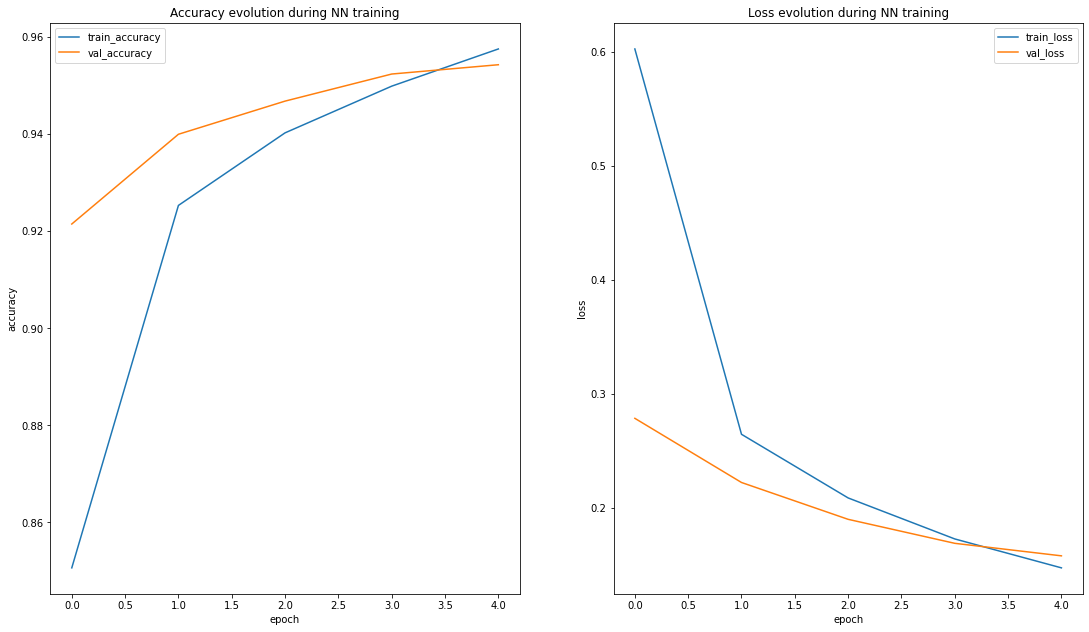

In [101]:
import matplotlib.pyplot as plt

def show_history(story):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18.5, 10.5)
    ax1.plot(story.history['accuracy'])
    ax1.plot(story.history['val_accuracy'])
    ax1.set(xlabel='epoch', ylabel='accuracy')
    ax1.legend(['train_accuracy', 'val_accuracy'], loc='best')
    ax1.set_title('Accuracy evolution during NN training')
    
    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train_loss', 'val_loss'], loc='best')
    ax2.set_title('Loss evolution during NN training')
    plt.show()

show_history(story)

If validation loss >> training loss you can call it overfitting.

If validation loss  > training loss you can call it some overfitting.

If validation loss  < training loss you can call it some underfitting.

If validation loss << training loss you can call it underfitting.

Just right if training loss ~ validation loss


In [51]:
# Compute predictions
yhat = model.predict(X_test)
yhat.shape

(10000, 10)

In [57]:
yhat[0]

array([7.0588627e-05, 4.2238572e-08, 2.6500097e-04, 1.1583520e-02,
       1.9851488e-07, 2.5139956e-05, 1.1735981e-09, 9.8763251e-01,
       1.4008795e-05, 4.0897261e-04], dtype=float32)

In [52]:
# Finding the most probable class
yhat_c = np.argmax(yhat, axis=1)
print(yhat_c)

[7 2 1 ... 4 5 6]


In [58]:
yhat_c[0]

7

In [54]:
from sklearn.metrics import classification_report
target_names = ["0","1","2","3","4","5", "6","7","8","9"]
true_label = np.argmax(y_test,axis = 1)
print ('\nClasification report:\n', classification_report(true_label, yhat_c, target_names=target_names))


Clasification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.95      0.96      1032
           3       0.91      0.97      0.94      1010
           4       0.95      0.97      0.96       982
           5       0.95      0.94      0.95       892
           6       0.95      0.97      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.95      0.92      0.94       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

